Refer Chapter1 Codes for data understanding

In [2]:
# Load iris data
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()

petal_length=iris.data[:,2]
rows=iris.target==1
versicolor_petal_length=petal_length[rows]
versicolor_petal_length

import pandas as pd
df=pd.DataFrame(iris.data)
df.columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species_num=iris.target
species=[]
for i in range(0,len(species_num)):
    if species_num[i]==0:
            species.append('setosa')
    elif species_num[i]==1:
        species.append('versicolor')
    else:
        species.append('virginica')
species=np.array(species)
df['species']=species

setosa_petal_length=df[df.species=='setosa']["petal length (cm)"]
virginica_petal_length=df[df.species=='virginica']["petal length (cm)"]

Computing Means

The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

In [3]:
# Compute the mean: mean_length_vers
mean_length_vers=np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


Computing Percentiles

In [5]:
# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers=np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


Comparing percentiles to ECDF

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)


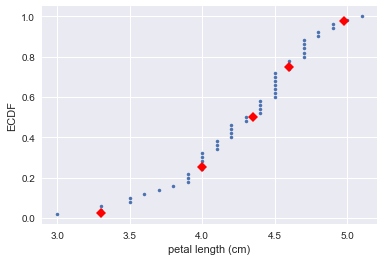

In [9]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns


# Set default Seaborn style
sns.set()

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


Box and Whisker Plot

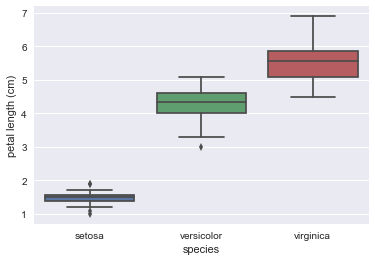

In [10]:
# Create box plot with Seaborn's default settings
_=sns.boxplot(x='species',y='petal length (cm)',data=df)

# Label the axes
_=plt.xlabel("species")
_=plt.ylabel("petal length (cm)")

# Show the plot
plt.show()


Computing The Variance

STD : Beacause the variance is square units it is not in the units in which the data is , we use sqrt on variance to compute std.

In [12]:
# Array of differences to mean: differences
differences=versicolor_petal_length-np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq=differences**2

# Compute the mean square difference: variance_explicit
variance_explicit=np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np=np.var(versicolor_petal_length)

# Print the results
print(variance_explicit,variance_np)


0.21640000000000004 0.21640000000000004


The Standard Deviation and the Variance

In [14]:
# Compute the variance: variance
variance=np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))


0.4651881339845203
0.4651881339845203


Scatter Plots

In [15]:
versicolor_petal_width=df[df.species=='versicolor']['petal width (cm)']

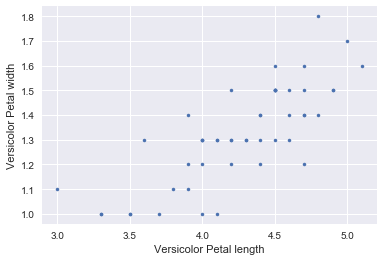

In [16]:
# Make a scatter plot
_=plt.plot(versicolor_petal_length,versicolor_petal_width,marker='.',linestyle='none')


# Label the axes
_=plt.xlabel("Versicolor Petal length")
_=plt.ylabel("Versicolor Petal width")


# Show the result
plt.show()

Computing the Covariance

The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [18]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix=np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov=covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


Computing the Pearson correlation coefficient


As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In [19]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
